In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels as sm
import seaborn as sns
sns.set(style="darkgrid")
import datetime
from scipy.stats import norm
from scipy import stats

In [103]:
#Load in the dataset, ensure that date columns are recognized in the datetime format. Find out dimensions of the dataset.
df = pd.read_csv('/home/jan/Desktop/sales_train_v2.csv', parse_dates = ['date'])
df.shape

(2935849, 6)

In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2935849 entries, 0 to 2935848
Data columns (total 6 columns):
date              datetime64[ns]
date_block_num    int64
shop_id           int64
item_id           int64
item_price        float64
item_cnt_day      float64
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 134.4 MB


In [4]:
#Check if any of the columns have missing data.
df.isnull().any()

date              False
date_block_num    False
shop_id           False
item_id           False
item_price        False
item_cnt_day      False
dtype: bool

In [5]:
#Descriptive statistics for numerical columns.
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
date_block_num,2935849.0,14.569911,9.422988,0.0,7.0,14.0,23.0,33.0
shop_id,2935849.0,33.001728,16.226973,0.0,22.0,31.0,47.0,59.0
item_id,2935849.0,10197.227057,6324.297354,0.0,4476.0,9343.0,15684.0,22169.0
item_price,2935849.0,890.853233,1729.799631,-1.0,249.0,399.0,999.0,307980.0
item_cnt_day,2935849.0,1.242641,2.618834,-22.0,1.0,1.0,1.0,2169.0


In [6]:
#Number of unique shops in the data.
df['shop_id'].nunique()

60

In [7]:
#Number of unique products in the data.
df['item_id'].nunique()

21807

In [8]:
#Sums of item_cnt_day. 3 categories(No sales, just one sold, more than one sold)
print(df[df['item_cnt_day'] < 1]['item_cnt_day'].value_counts().sum())
print(df[df['item_cnt_day'] == 1]['item_cnt_day'].value_counts().sum())
print(df[df['item_cnt_day'] > 1]['item_cnt_day'].value_counts().sum())

7356
2629372
299121


In [105]:
#Total revenue on a given day.
df['target'] = df['item_cnt_day'] * df['item_price']

In [116]:
#Drop item_id and shop_id for a simplistic model.
df_train = df.iloc[:, [0, 6]] 
df_train.head()

,date,target
0,2013-02-01,999.00
1,2013-03-01,899.00
2,2013-05-01,-899.00
3,2013-06-01,1709.05
4,2013-01-15,1099.00


In [117]:
#Group all the duplicate days into a sum.
df_train['total_daily'] = df_train.groupby(by='date').transform('sum')
df_train

/home/jan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,date,target,total_daily
0,2013-02-01,999.00,6020512.03
1,2013-03-01,899.00,5436480.11
2,2013-05-01,-899.00,4587231.00
3,2013-06-01,1709.05,4272597.00
4,2013-01-15,1099.00,2524567.50
5,2013-10-01,349.00,2295337.50
6,2013-02-01,549.00,6020512.03
7,2013-04-01,239.00,4755664.00
8,2013-11-01,299.00,2863546.60
9,2013-03-01,897.00,5436480.11


In [118]:
df_train = df_train.drop(['target'], axis=1)

In [119]:
df_train.drop_duplicates(subset='date', keep='first', inplace=True)

In [120]:
df_train['date'] = pd.to_datetime(df_train['date'], infer_datetime_format=False)
df_train.set_index('date', inplace=True)

In [133]:
df_train = df_train.resample('M').sum()

In [142]:
df_train

,total_daily
date,
2013-01-31,8.135506e+07
2013-02-28,9.479086e+07
2013-03-31,1.006548e+08
2013-04-30,7.524793e+07
2013-05-31,8.020317e+07
2013-06-30,9.117392e+07
2013-07-31,8.144784e+07
2013-08-31,8.424181e+07
2013-09-30,1.192925e+08


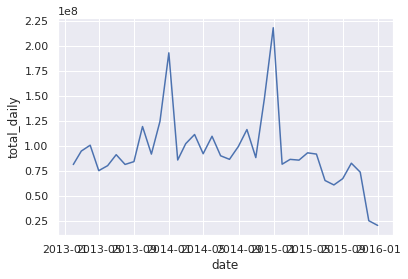

In [141]:
sns.lineplot(data=df_train.reset_index(), x='date', y='total_daily')